In [15]:
# Libraries

import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Download the data

In [16]:
# The symbol needs to match one from the website https://finance.yahoo.com/markets/
SYMBOL = "BTC-USD"

ticker = yf.Ticker(SYMBOL)

# Download historical data
history = ticker.history(start='2008-01-01', end='2024-07-31', interval='1d')

# Convert column names to lowercase
ohlcv_data = history[['Open', 'High', 'Low', 'Close', 'Volume']].rename(
    columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})
ohlcv_data.index = ohlcv_data.index.rename('timestamp')

# save the processed data for later use
# ohlcv_data.to_pickle(f'./ohlcv-data/{SYMBOL}.pkl')

### Plot the candlesticks

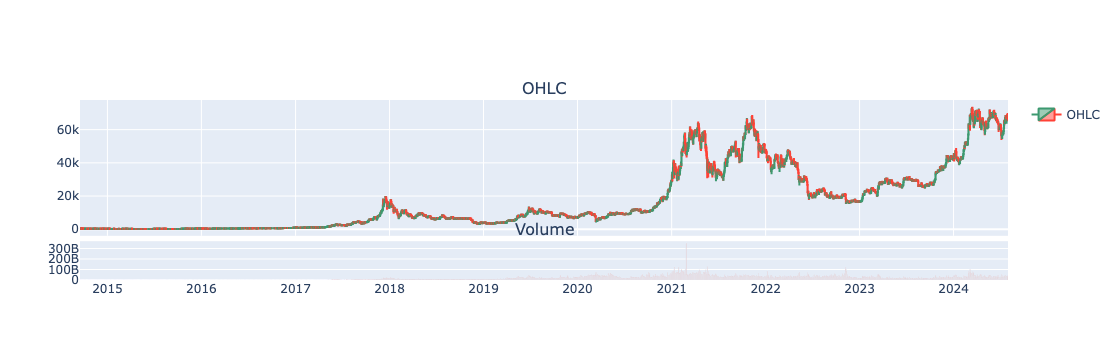

In [17]:
# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03, subplot_titles=('OHLC', 'Volume'),
                    row_width=[0.2, 0.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=ohlcv_data.index, open=ohlcv_data["open"], high=ohlcv_data["high"],
                             low=ohlcv_data["low"], close=ohlcv_data["close"], name="OHLC"),
              row=1, col=1
              )

# Bar trace for volumes on 2nd row without legend
fig.add_trace(go.Bar(x=ohlcv_data.index, y=ohlcv_data['volume'], showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot
fig.update(layout_xaxis_rangeslider_visible=False)